# This file is to subset data and rearrange the highly correlated grains Oats, Barley, Rye for the ARIMA forecasting job.


In [1]:
#Load Libraries

import pandas as pd
from matplotlib import pyplot
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame



In [2]:
# Load Data
globalHoneyCorr = pd.read_csv("../Data/usdaGlobal_HighCorr_Honey.csv")

globalHoneyCorr.head(50)

,Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
0,"Almonds, Shelled Basis",1998,235884,US,United States,Production,(MT)
1,"Almonds, Shelled Basis",1999,377800,US,United States,Production,(MT)
2,"Almonds, Shelled Basis",2000,318900,US,United States,Production,(MT)
3,"Almonds, Shelled Basis",2001,376500,US,United States,Production,(MT)
4,"Almonds, Shelled Basis",2002,494416,US,United States,Production,(MT)
5,"Almonds, Shelled Basis",2003,471740,US,United States,Production,(MT)
6,"Almonds, Shelled Basis",2004,462664,US,United States,Production,(MT)
7,"Almonds, Shelled Basis",2005,415040,US,United States,Production,(MT)
8,"Almonds, Shelled Basis",2006,508023,US,United States,Production,(MT)
9,"Almonds, Shelled Basis",2007,630500,US,United States,Production,(MT)


In [3]:
# Picking highly correlated commodity in grains  - Barley, Oats, Rye.

Barley_DS = globalHoneyCorr[globalHoneyCorr.Commodity_Description == 'Barley']

Oats_DS = globalHoneyCorr[globalHoneyCorr.Commodity_Description == 'Oats']

Rye_DS = globalHoneyCorr[globalHoneyCorr.Commodity_Description == 'Rye']

In [4]:
# Subsetting the Datasets to have year and production value

Barley_DS1 = Barley_DS[["Year", "Value"]]

Oats_DS1 = Oats_DS[["Year", "Value"]]

Rye_DS1 = Rye_DS[["Year", "Value"]]



Barley_DS1 = pd.DataFrame(data=Barley_DS1)
Oats_DS1 = pd.DataFrame(data=Oats_DS1)
Rye_DS1 = pd.DataFrame(data=Rye_DS1)





In [5]:
# Renaming the column Value

Barley_DS1.rename(columns = {'Value':'BarleyProd'}, inplace = True)

Oats_DS1.rename(columns = {'Value':'OatsProd'}, inplace = True)

Rye_DS1.rename(columns = {'Value':'RyeProd'}, inplace = True)

In [17]:
# Saving the dataset as CSV file for future use


Barley_DS1.to_csv(r'../Data/BarleyArima.csv', index = False)

Oats_DS1.to_csv(r'../Data/OatsArima.csv', index = False)

Rye_DS1.to_csv(r'../Data/RyeArima.csv', index = False)



# Working on Barley 

In [7]:
# Reformat the Year as Date and extracting only the year out of it.

Barley_DS2 = pd.DataFrame(data=Barley_DS1)

Barley_DS2['Year'] = Barley_DS2['Year'].astype(str)
Barley_DS2['Year'] = Barley_DS2['Year'].apply(lambda s: s+"-01-01")
Barley_DS2['Year'] = pd.to_datetime(Barley_DS2.Year)
Barley_DS2['Year'] = Barley_DS2['Year'].dt.year

In [8]:
Barley_DS2.set_index('Year', inplace=True)

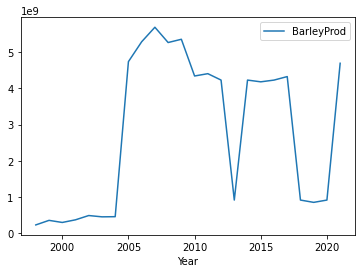

In [9]:
Barley_DS2.plot()
pyplot.show()


In [10]:
print(Barley_DS2.describe())

         BarleyProd
count  2.400000e+01
mean   2.801824e+09
std    2.135554e+09
min    2.358840e+08
25%    4.864780e+08
50%    4.202762e+09
75%    4.475199e+09
max    5.683040e+09


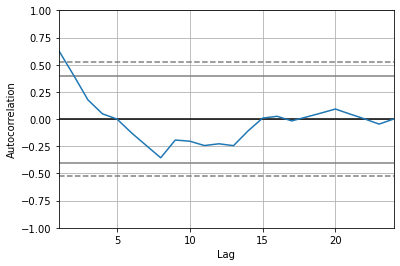

{'adf': -1.2406416518278522,
 'pvalue': 0.6558730436045354,
 'usedlag': 9,
 'nobs': 14,
 'criticalvalues': {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 'icbest': 634.0830837319835}

In [11]:
# As we can clearly see, there is no trend in time and that suggests that the data are stationary.
# However just to be sure we will use an Augmented Dickey-Fuller test.

autocorrelation_plot(Barley_DS2)
pyplot.show()

result = adfuller(Barley_DS2['BarleyProd'], autolag = 'AIC')

#to help you, we added the names of every value

dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))


In [12]:
# Analysing the results

# Test statistic: -1.24
# P-value: 0.65
    
# We failed to reject the Null Hypothesis and the series has a unit root thus is not stationary.
# In other words, it has some time-dependent structure and does not have constant variance over time.

<AxesSubplot:xlabel='Year'>

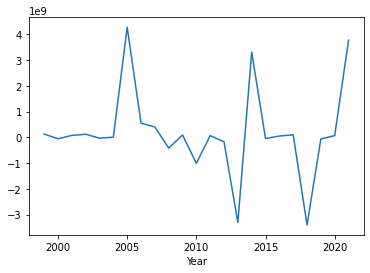

In [13]:
Barley_DS2['1difference']=Barley_DS2['BarleyProd']-Barley_DS2['BarleyProd'].shift(1)
Barley_DS2['1difference'].plot()

In [14]:
# Barley_DS2.dropna()

result = adfuller(Barley_DS2['1difference'].dropna(), autolag = 'AIC')

#to help you, we added the names of every value

#dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

result

(-0.9714583338721993,
 0.763531382981293,
 8,
 14,
 {'1%': -4.01203360058309,
  '5%': -3.1041838775510207,
  '10%': -2.6909873469387753},
 594.3682191666715)

<AxesSubplot:xlabel='Year'>

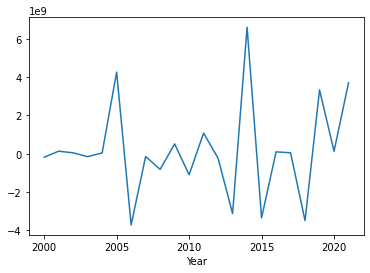

In [15]:
Barley_DS2['2difference']=Barley_DS2['1difference']-Barley_DS2['1difference'].shift(1)
Barley_DS2['2difference'].plot()

In [16]:
result = adfuller(Barley_DS2['2difference'].dropna(), autolag = 'AIC')
result



(-1.8892995548622382,
 0.3371115603404965,
 8,
 13,
 {'1%': -4.068853732362312,
  '5%': -3.1271488757396453,
  '10%': -2.7017297633136095},
 547.0152818883897)

<AxesSubplot:xlabel='Year'>

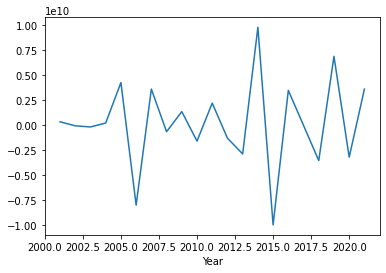

In [17]:
Barley_DS2['3difference']=Barley_DS2['2difference']-Barley_DS2['2difference'].shift(1)
Barley_DS2['3difference'].plot()

In [18]:
result = adfuller(Barley_DS2['3difference'].dropna(), autolag = 'AIC')
result

(-1.9250639731319283,
 0.32036363003439494,
 8,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 551.7131422128583)

(-1.8808155407183162,
 0.34113920172995005,
 8,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 499.6415906238096)

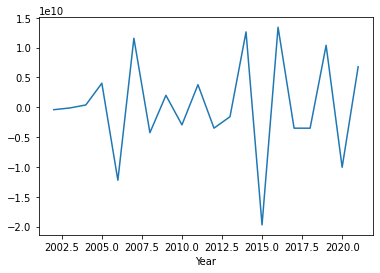

In [19]:
Barley_DS2['4difference']=Barley_DS2['3difference']-Barley_DS2['3difference'].shift(1)
Barley_DS2['4difference'].plot()

result = adfuller(Barley_DS2['4difference'].dropna(), autolag = 'AIC')
result

In [20]:
# Looks like p-val is going up.. let's keep it 3rd difference.

Barley_DS2['3difference'].dropna()


Year
2001    3.135900e+08
2002   -8.531000e+07
2003   -1.989020e+08
2004    1.936780e+08
2005    4.228304e+09
2006   -7.992764e+09
2007    3.577102e+09
2008   -6.739540e+08
2009    1.332126e+09
2010   -1.612337e+09
2011    2.177476e+09
2012   -1.316000e+09
2013   -2.890196e+09
2014    9.743073e+09
2015   -9.966998e+09
2016    3.449931e+09
2017   -4.637300e+07
2018   -3.548954e+09
2019    6.838860e+09
2020   -3.212206e+09
2021    3.578799e+09
Name: 3difference, dtype: float64

                               SARIMAX Results                                
Dep. Variable:             BarleyProd   No. Observations:                   24
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -661.806
Date:                Tue, 19 Jul 2022   AIC                           1325.611
Time:                        21:48:09   BIC                           1326.703
Sample:                             0   HQIC                          1325.869
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.485e+17   4.41e+15     79.009      0.000     3.4e+17    3.57e+17
Ljung-Box (L1) (Q):                   6.76   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.01   Pr

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


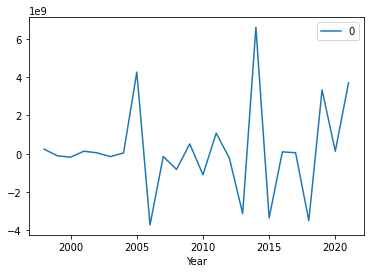

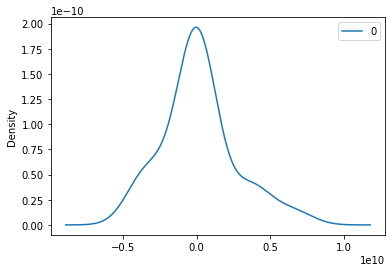

                  0
count  2.400000e+01
mean   1.570545e+08
std    2.440300e+09
min   -3.724544e+09
25%   -3.854472e+08
50%    4.252800e+07
75%    3.045955e+08
max    6.612746e+09


In [21]:
# fit model
model = ARIMA(Barley_DS2['BarleyProd'], order=(0,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [22]:
# Still learning and will do more tests in new files.